In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, RocCurveDisplay
plt.rcParams["figure.figsize"] = (10,8)

In [11]:
# https://www.kaggle.com/datasets/deepcontractor/smoke-detection-dataset
dt = pd.read_csv("../smoke_detection_iot.csv", index_col=0)

KeyboardInterrupt: 

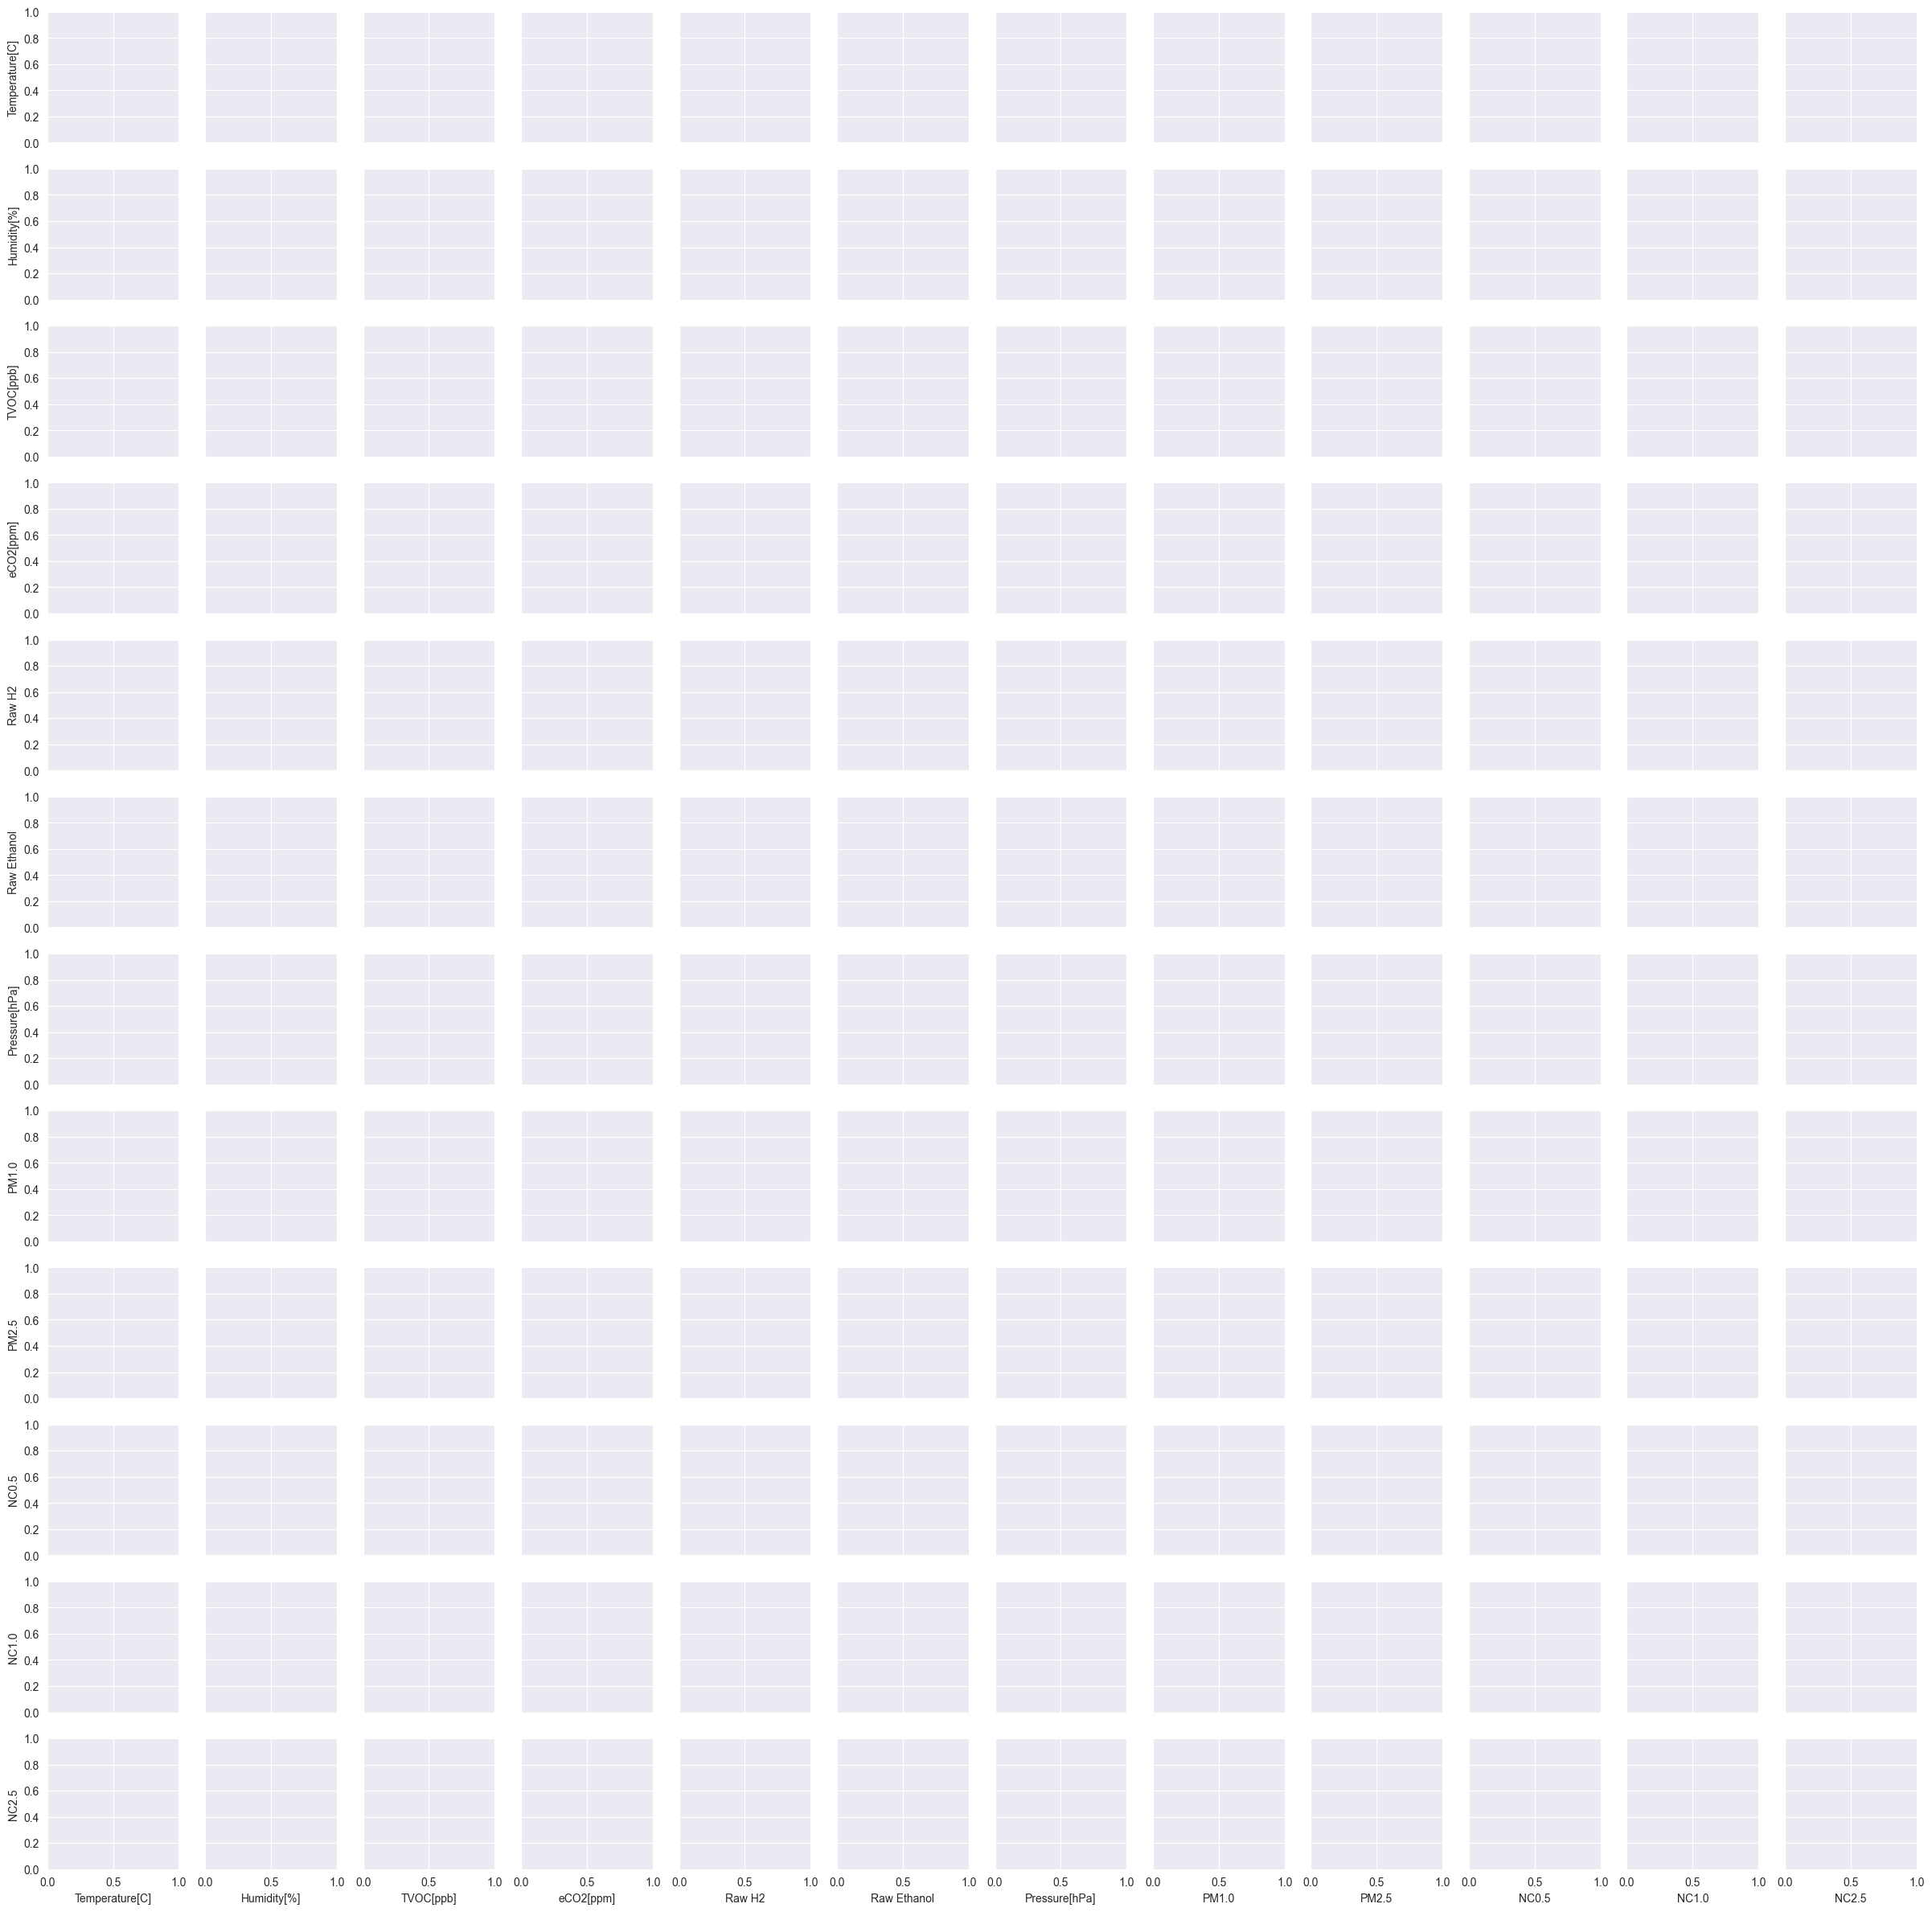

In [9]:
# sns.pairplot(data=dt.drop(["UTC", "CNT"], axis=1), hue="Fire Alarm")

In [12]:
dt.shape

(62630, 15)

In [13]:
dt.columns

Index(['UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]',
       'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5',
       'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm'],
      dtype='object')

In [14]:
dt.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


C:\Users\JuliPrieto\AppData\Local\Temp\ipykernel_1664\4007941835.py:2: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(dt["Fire Alarm"], labels=["Alarma", "No Alarma"], fontsize=16, loc="upper left")


Text(0, 0.5, 'Densidad')

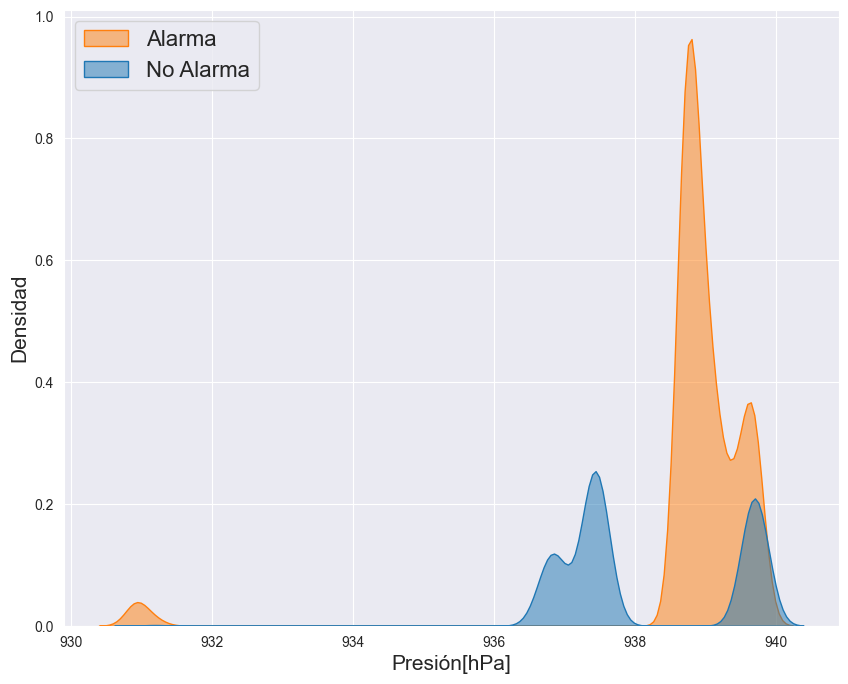

In [15]:
sns.kdeplot(data=dt, x="Pressure[hPa]", hue="Fire Alarm", fill=True, alpha=0.5)
plt.legend(dt["Fire Alarm"], labels=["Alarma", "No Alarma"], fontsize=16, loc="upper left")
plt.xlabel("Presión[hPa]", fontsize=15)
plt.ylabel("Densidad", fontsize=15)

C:\Users\JuliPrieto\AppData\Local\Temp\ipykernel_1664\3758393422.py:5: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(dt["Fire Alarm"], labels=["Alarma", "No Alarma"], fontsize=16, loc="upper left")


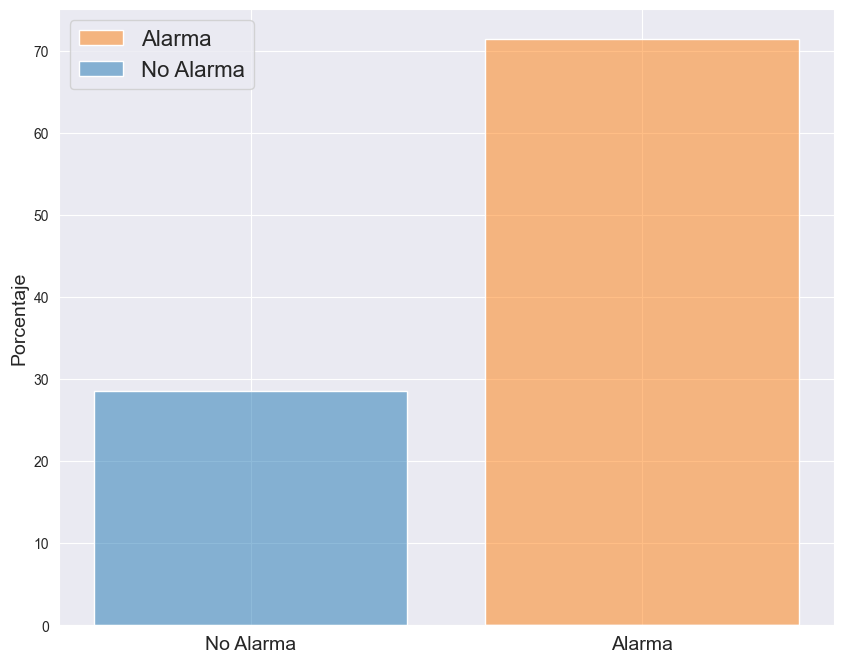

In [16]:
sns.histplot(data=dt, x="Fire Alarm", hue="Fire Alarm", discrete=True, stat="percent", shrink=.8)
plt.xticks(np.arange(0, 2, 1), labels=["No Alarma", "Alarma"], fontsize=14)
plt.xlabel("")
plt.ylabel("Porcentaje", fontsize=14)
plt.legend(dt["Fire Alarm"], labels=["Alarma", "No Alarma"], fontsize=16, loc="upper left")

In [17]:
X = dt.drop(["UTC", "CNT", "Fire Alarm"], axis=1)
y = dt["Fire Alarm"]
X.shape, y.shape

((62630, 12), (62630,))

In [18]:
def graficar(comp, loads, classes):
    x = comp[:,0]
    y = comp[:,1]
    scatter = plt.scatter(x, y, c=classes, alpha=.6)
    plt.legend(handles=scatter.legend_elements()[0], labels=["No Alarma","Alarma"], fontsize=16)


[0.526, 0.153]
[[ 0.04308533 -0.15262164  0.2938316   0.31179427 -0.27622533 -0.24073227
  -0.14666192  0.38007677  0.36086965  0.36023277  0.35832124  0.32045033]
 [-0.34233222  0.55843795 -0.22036302 -0.15103803  0.20610655 -0.00081249
   0.48520281  0.15714724  0.23553234  0.04845239  0.24028122  0.28535518]]


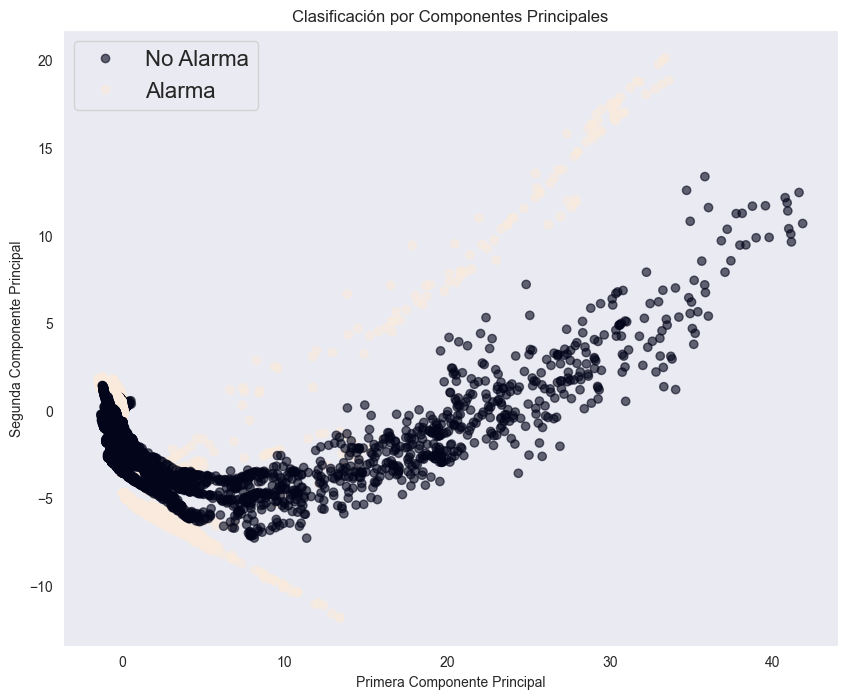

In [19]:
scaler = StandardScaler().fit(X)
X_custom = scaler.transform(X)

pca = PCA().fit(X_custom, y)
X_new = pca.transform(X_custom)
# Varianza de las dos primeros componentes
print([round(x, 3) for x in pca.explained_variance_ratio_][:2])
# Cargas/Loadings de las dos primeros componentes
print(pca.components_[:2])

graficar(X_new[:,0:2], pca.components_, y)
plt.xlabel("Primera Componente Principal")
plt.ylabel("Segunda Componente Principal")
plt.title("Clasificación por Componentes Principales")
plt.grid(False)
plt.show()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=242)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((43841, 12), (43841,), (18789, 12), (18789,))

In [21]:
scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
pca = PCA().fit(X_test, y_test)
X_new = pca.transform(X_test)

# Varianza de las dos primeros componentes
print([round(x, 3) for x in pca.explained_variance_ratio_][:2])
# Cargas/Loadings de las dos primeros componentes
print(pca.components_[:2])
#print(pca.components_.shape[1])

[0.539, 0.148]
[[ 0.04054059 -0.15200868  0.2955342   0.33604687 -0.28093931 -0.24271022
  -0.1409659   0.37463295  0.35620658  0.35347453  0.35369786  0.31622133]
 [-0.34451366  0.54773682 -0.2084227  -0.16401496  0.20531508 -0.01345282
   0.49601426  0.16066372  0.23615138  0.05475363  0.24067161  0.28299698]]


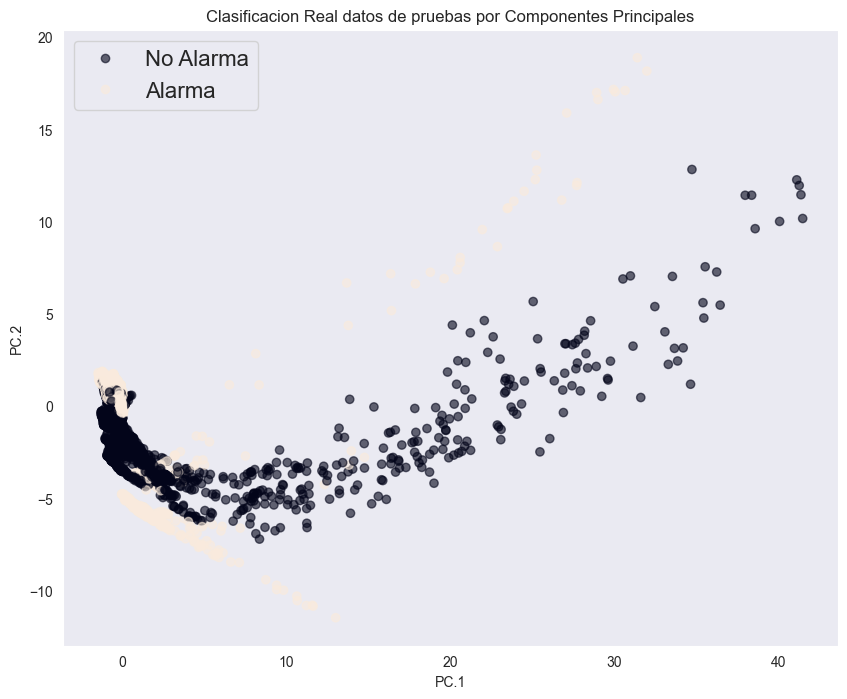

In [24]:
graficar(X_new[:,0:2], pca.components_, y_test)
plt.xlabel("PC.1")
plt.ylabel("PC.2")
plt.title("Clasificacion Real datos de pruebas por Componentes Principales")
plt.grid()
plt.show()

# NaiveBayesAnalysis


Gaussian Naive Bayes

In [25]:
target = dt["Fire Alarm"].value_counts()
target.index

Int64Index([1, 0], dtype='int64')


Métricas sobre datos nuevos de TEST con punto de corte normal
Accuracy:  0.77
Recall:  0.98
Precision:  0.76
F1:  0.86


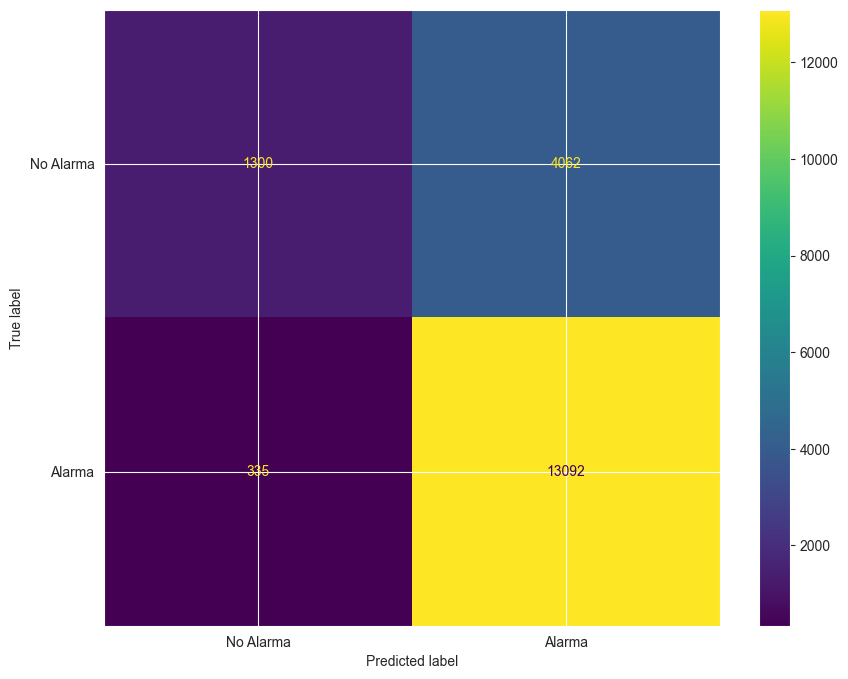

In [26]:
target = ["No Alarma", "Alarma"]

gnb = GaussianNB().fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

# Matriz de confusion
conf = confusion_matrix(y_test, y_pred_gnb)
disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=target)
disp.plot(values_format='d')
# Scoring
accuracy = accuracy_score(y_test, y_pred_gnb)
recall = recall_score(y_test, y_pred_gnb)
precision = precision_score(y_test, y_pred_gnb)
f1 = f1_score(y_test, y_pred_gnb)

print('')
print('Métricas sobre datos nuevos de TEST con punto de corte normal')
print('Accuracy: ', round(accuracy,2))
print('Recall: ', round(recall,2))
print('Precision: ', round(precision,2))
print('F1: ', round(f1,2))



Métricas sobre datos nuevos de TEST con punto de corte arbitrario
Accuracy:  0.76
Recall:  0.98
Precision:  0.76
F1:  0.85


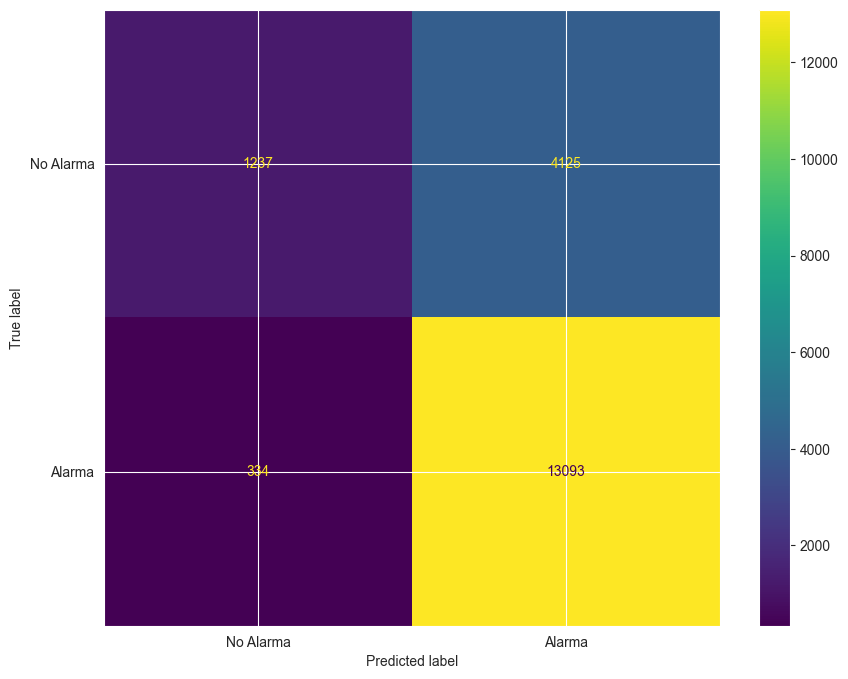

In [27]:
y_prob_gnb = gnb.predict_proba(X_test)
y_pred_gnb_08 = np.ones(y_test.shape)

for i in range(y_test.shape[0]):
    if y_prob_gnb[i,0] >= 0.8:
        y_pred_gnb_08[i] = 0

# Matriz de confusion
conf = confusion_matrix(y_test, y_pred_gnb_08)
disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=target)
disp.plot(values_format='d')
# Scoring
accuracy = accuracy_score(y_test, y_pred_gnb_08)
recall = recall_score(y_test, y_pred_gnb_08)
precision = precision_score(y_test, y_pred_gnb_08)
f1 = f1_score(y_test, y_pred_gnb_08)

print('')
print('Métricas sobre datos nuevos de TEST con punto de corte arbitrario')
print('Accuracy: ', round(accuracy,2))
print('Recall: ', round(recall,2))
print('Precision: ', round(precision,2))
print('F1: ', round(f1,2))

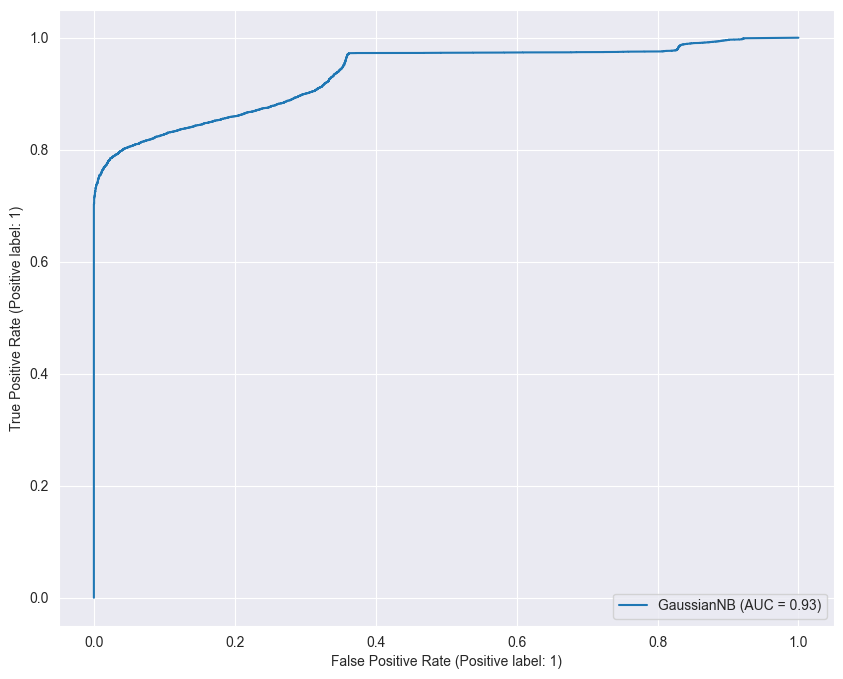

In [41]:
RocCurveDisplay.from_estimator(gnb, X_test, y_test)

Bernoulli Naive Bayes


Métricas sobre datos nuevos de TEST con punto de corte arbitrario
Accuracy:  0.88
Recall:  0.97
Precision:  0.87
F1:  0.92


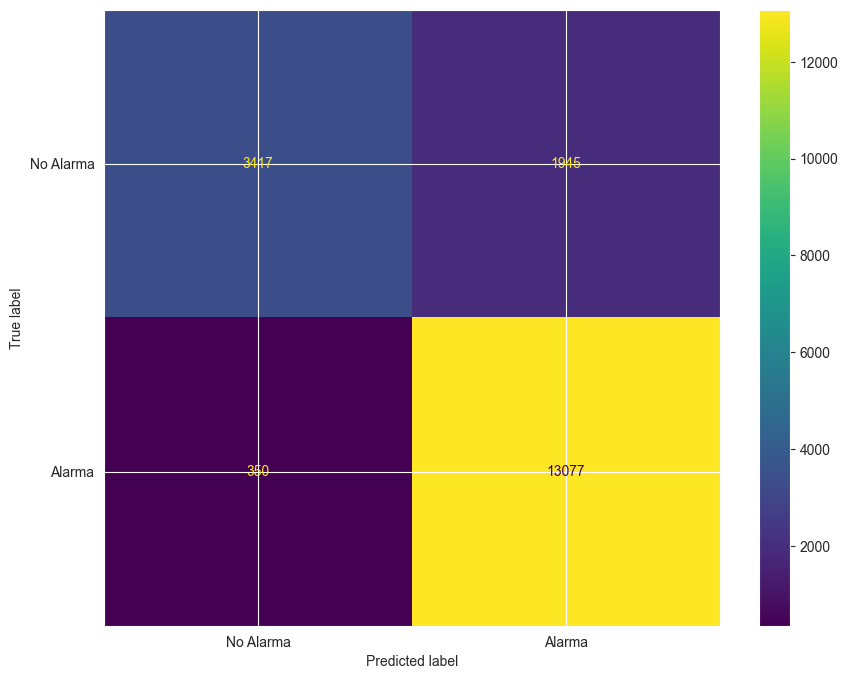

In [29]:
bnb = BernoulliNB().fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)

# Matriz de confusion
conf = confusion_matrix(y_test, y_pred_bnb)
disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=target)
disp.plot(values_format='d')
# Scoring
accuracy = accuracy_score(y_test, y_pred_bnb)
recall = recall_score(y_test, y_pred_bnb)
precision = precision_score(y_test, y_pred_bnb)
f1 = f1_score(y_test, y_pred_bnb)

print('')
print('Métricas sobre datos nuevos de TEST con punto de corte arbitrario')
print('Accuracy: ', round(accuracy,2))
print('Recall: ', round(recall,2))
print('Precision: ', round(precision,2))
print('F1: ', round(f1,2))

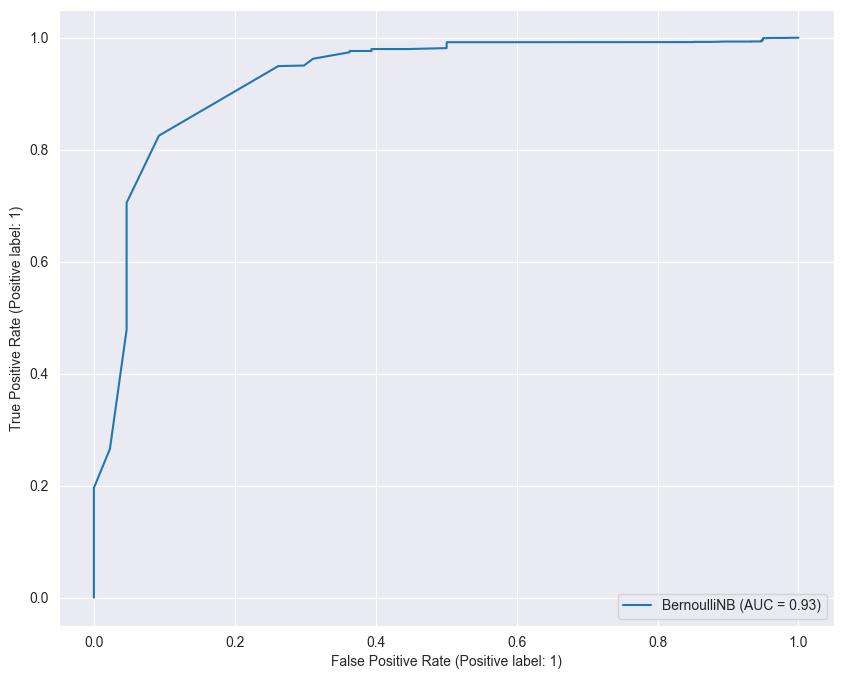

In [42]:
RocCurveDisplay.from_estimator(bnb, X_test, y_test)

# LinearDiscriminantAnalysis


Métricas sobre datos nuevos de TEST con punto de corte arbitrario
Accuracy:  0.87
Recall:  0.98
Precision:  0.85
F1:  0.91


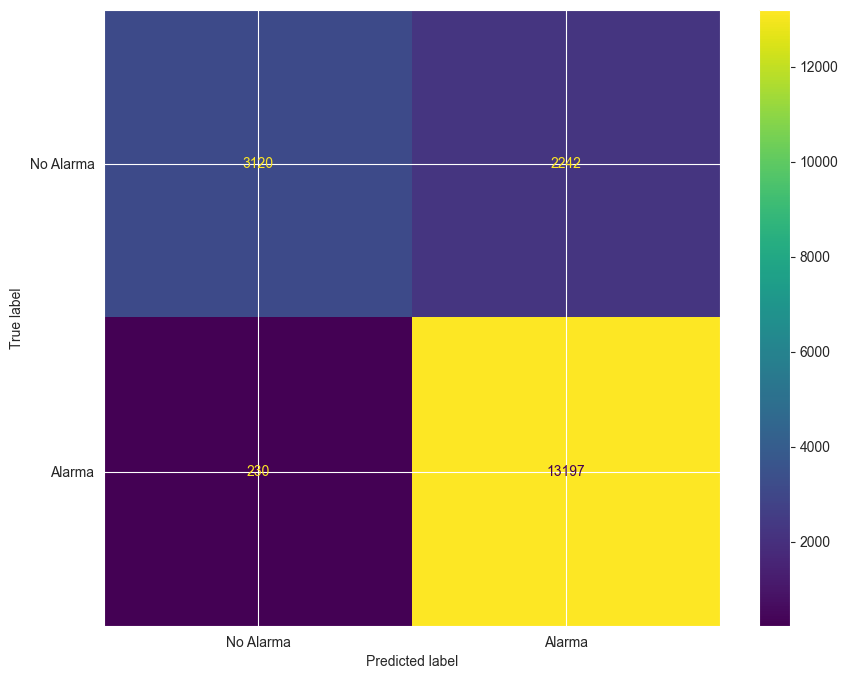

In [30]:
lda = LinearDiscriminantAnalysis().fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)

# Matriz de confusion
conf = confusion_matrix(y_test, y_pred_lda)
disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=target)
disp.plot(values_format='d')
# Scoring
accuracy = accuracy_score(y_test, y_pred_lda)
recall = recall_score(y_test, y_pred_lda)
precision = precision_score(y_test, y_pred_lda)
f1 = f1_score(y_test, y_pred_lda)

print('')
print('Métricas sobre datos nuevos de TEST con punto de corte arbitrario')
print('Accuracy: ', round(accuracy,2))
print('Recall: ', round(recall,2))
print('Precision: ', round(precision,2))
print('F1: ', round(f1,2))



Métricas sobre datos nuevos de TEST con punto de corte arbitrario
Accuracy:  0.86
Recall:  0.99
Precision:  0.85
F1:  0.91


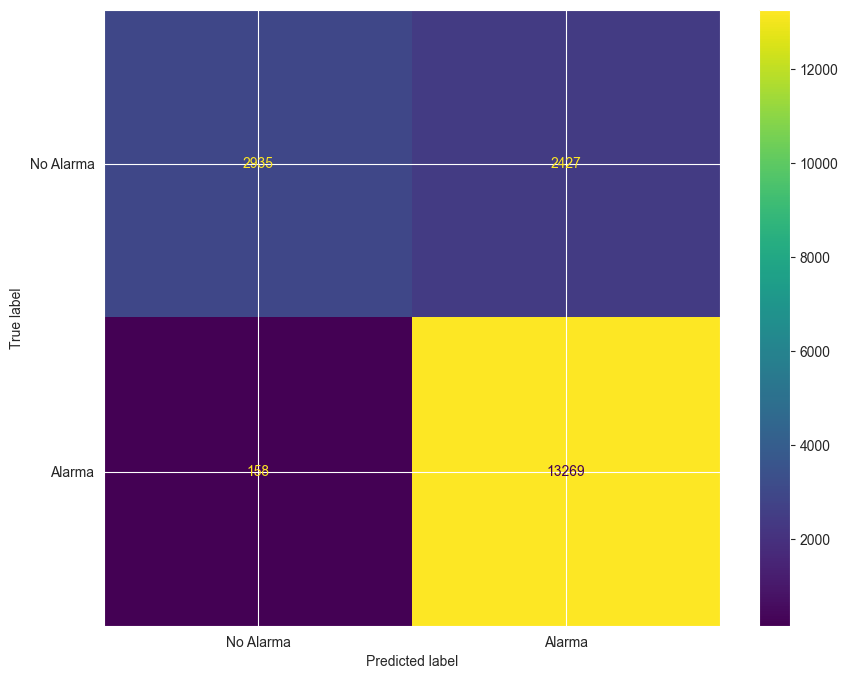

In [31]:
y_prob_lda = lda.predict_proba(X_test)
y_pred_lda_08 = np.ones(y_test.shape)

for i in range(y_test.shape[0]):
    if y_prob_lda[i,0] >= 0.8:
        y_pred_lda_08[i] = 0

# Matriz de confusion
conf = confusion_matrix(y_test, y_pred_lda_08)
disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=target)
disp.plot(values_format='d')
# Scoring
accuracy = accuracy_score(y_test, y_pred_lda_08)
recall = recall_score(y_test, y_pred_lda_08)
precision = precision_score(y_test, y_pred_lda_08)
f1 = f1_score(y_test, y_pred_lda_08)

print('')
print('Métricas sobre datos nuevos de TEST con punto de corte arbitrario')
print('Accuracy: ', round(accuracy,2))
print('Recall: ', round(recall,2))
print('Precision: ', round(precision,2))
print('F1: ', round(f1,2))


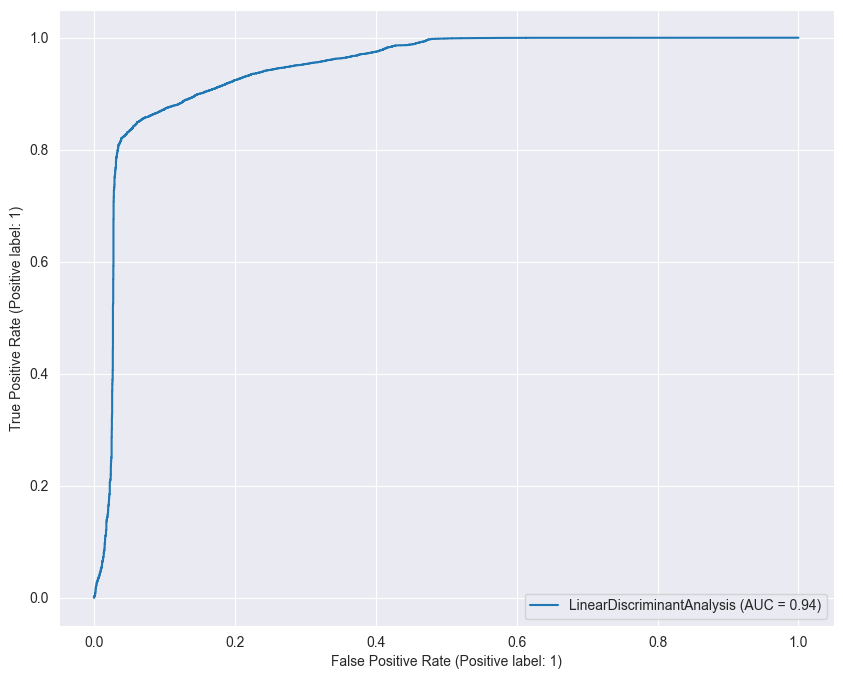

In [43]:
RocCurveDisplay.from_estimator(lda, X_test, y_test)

# QuadraticDiscriminantAnalysis

C:\Users\JuliPrieto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Métricas sobre datos nuevos de TEST con punto de corte arbitrario
Accuracy:  0.9
Recall:  0.99
Precision:  0.89
F1:  0.94


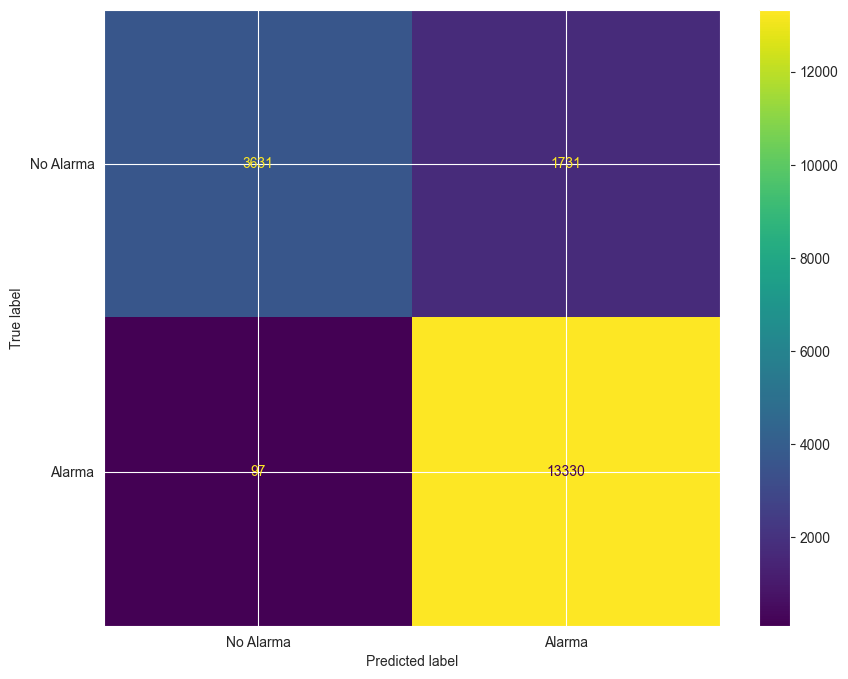

In [32]:
qda = QuadraticDiscriminantAnalysis().fit(X_train, y_train)
y_pred_qda = qda.predict(X_test)

# Matriz de confusion
conf = confusion_matrix(y_test, y_pred_qda)
disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=target)
disp.plot(values_format='d')
# Scoring
accuracy = accuracy_score(y_test, y_pred_qda)
recall = recall_score(y_test, y_pred_qda)
precision = precision_score(y_test, y_pred_qda)
f1 = f1_score(y_test, y_pred_qda)

print('')
print('Métricas sobre datos nuevos de TEST con punto de corte arbitrario')
print('Accuracy: ', round(accuracy,2))
print('Recall: ', round(recall,2))
print('Precision: ', round(precision,2))
print('F1: ', round(f1,2))



Métricas sobre datos nuevos de TEST con punto de corte arbitrario
Accuracy:  0.9
Recall:  0.99
Precision:  0.88
F1:  0.93


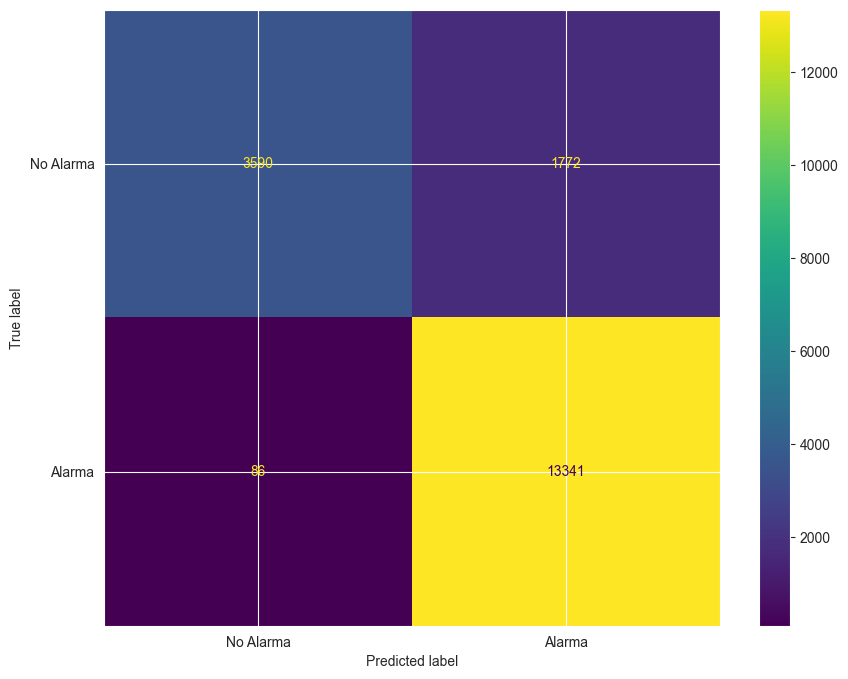

In [33]:
y_prob_qda = qda.predict_proba(X_test)
y_pred_qda_08 = np.ones(y_test.shape)

for i in range(y_test.shape[0]):
    if y_prob_qda[i,0] >= 0.8:
        y_pred_qda_08[i] = 0

# Matriz de confusion
conf = confusion_matrix(y_test, y_pred_qda_08)
disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=target)
disp.plot(values_format='d')
# Scoring
accuracy = accuracy_score(y_test, y_pred_qda_08)
recall = recall_score(y_test, y_pred_qda_08)
precision = precision_score(y_test, y_pred_qda_08)
f1 = f1_score(y_test, y_pred_qda_08)

print('')
print('Métricas sobre datos nuevos de TEST con punto de corte arbitrario')
print('Accuracy: ', round(accuracy,2))
print('Recall: ', round(recall,2))
print('Precision: ', round(precision,2))
print('F1: ', round(f1,2))


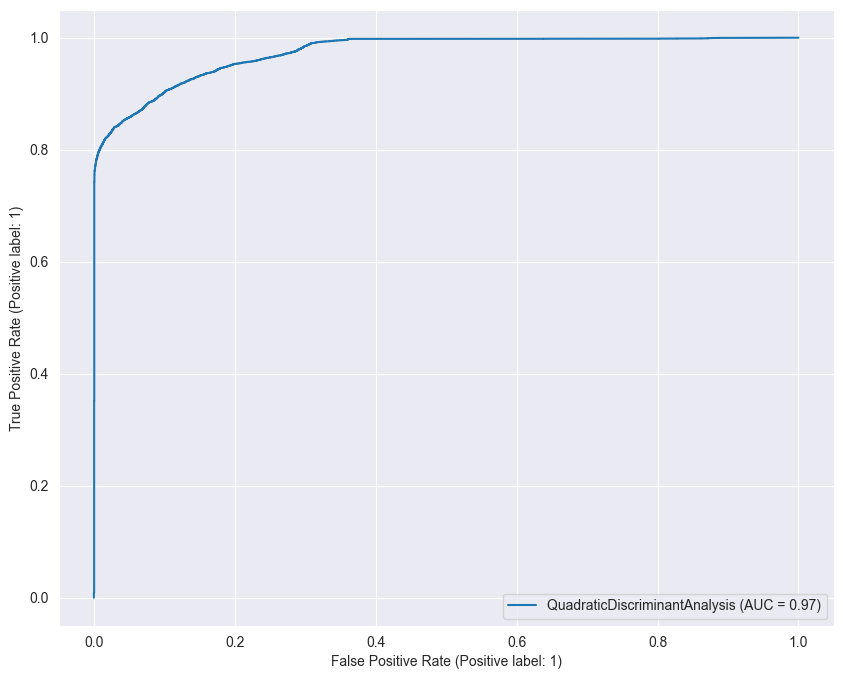

In [44]:
RocCurveDisplay.from_estimator(qda, X_test, y_test)

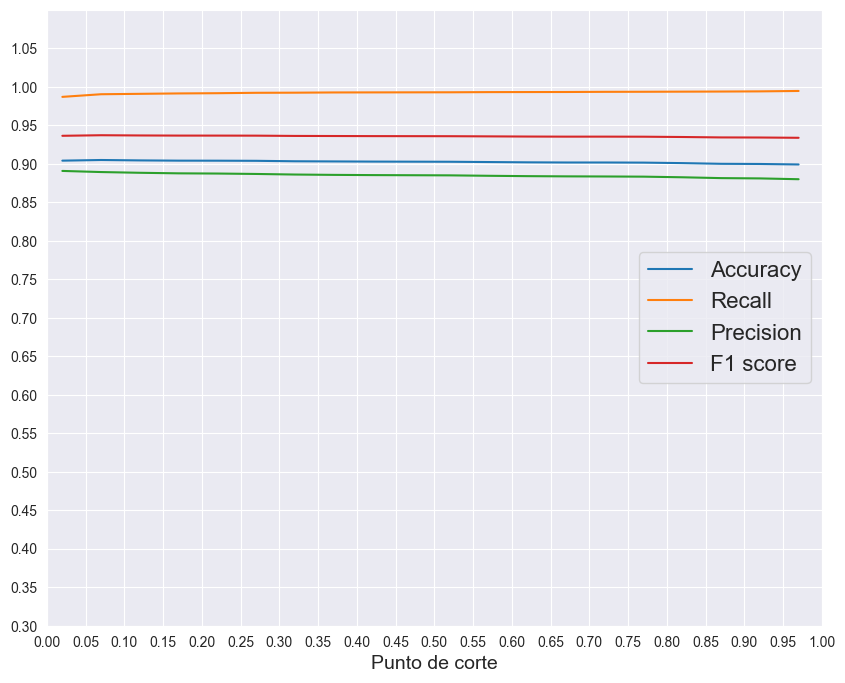

In [34]:
y_prob_qda = qda.predict_proba(X_test)

puntos_corte = np.arange(0.02, 1, 0.05)
acc = []
recall = []
prec = []
f1 = []

for p in puntos_corte:
    y_pred_custom = np.ones(y_test.shape)
    for i in range(y_prob_qda.shape[0]):
        if y_prob_qda[i, 0] > p:
            y_pred_custom[i] = 0
    acc.append( accuracy_score(y_test, y_pred_custom) )
    recall.append( recall_score(y_test, y_pred_custom) )
    prec.append( precision_score(y_test, y_pred_custom) )
    f1.append( f1_score(y_test, y_pred_custom) )

avg_acc = sum(acc) / len(acc)
avg_recall = sum(recall) / len(recall)
avg_prec = sum(prec) / len(prec)
avg_f1 = sum(f1) / len(f1)


plt.plot(puntos_corte, acc, puntos_corte, recall, puntos_corte, prec, puntos_corte, f1)
plt.xlim(0,1)
plt.ylim(0.3,1.1)
plt.xlabel('Punto de corte', fontsize=14)
plt.yticks(np.arange(0.3,1.1,0.05))
plt.xticks(np.arange(0,1.05,0.05))
plt.legend(['Accuracy','Recall','Precision','F1 score'], loc='center right', fontsize=16)
plt.grid(True)

# LogisticRegression


Métricas sobre datos nuevos de TEST con punto de corte 0.5
Accuracy:  0.89
Recall:  0.95
Precision:  0.91
F1:  0.93


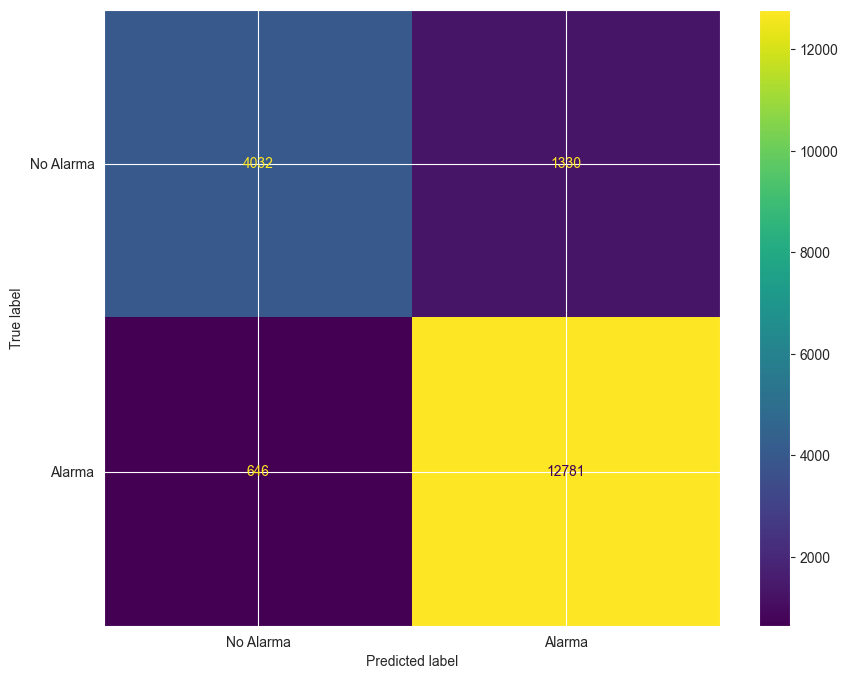

In [35]:
reg = LogisticRegression().fit(X_train, y_train)
y_pred_reg = reg.predict(X_test)

# Matriz de confusion
conf = confusion_matrix(y_test, y_pred_reg)
disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=target)
disp.plot(values_format='d')
# Scoring
accuracy = accuracy_score(y_test, y_pred_reg)
recall = recall_score(y_test, y_pred_reg)
precision = precision_score(y_test, y_pred_reg)
f1 = f1_score(y_test, y_pred_reg)

print('')
print('Métricas sobre datos nuevos de TEST con punto de corte 0.5')
print('Accuracy: ', round(accuracy,2))
print('Recall: ', round(recall,2))
print('Precision: ', round(precision,2))
print('F1: ', round(f1,2))


In [36]:
reg.coef_

array([[ -1.06656644,   1.42150337, -17.26792192,   5.33504527,
          3.24908289,  -7.64215198,  -2.40830524,  -0.32212928,
         -0.1914753 ,  -0.43785837,  -0.1815925 ,  -0.06890591]])

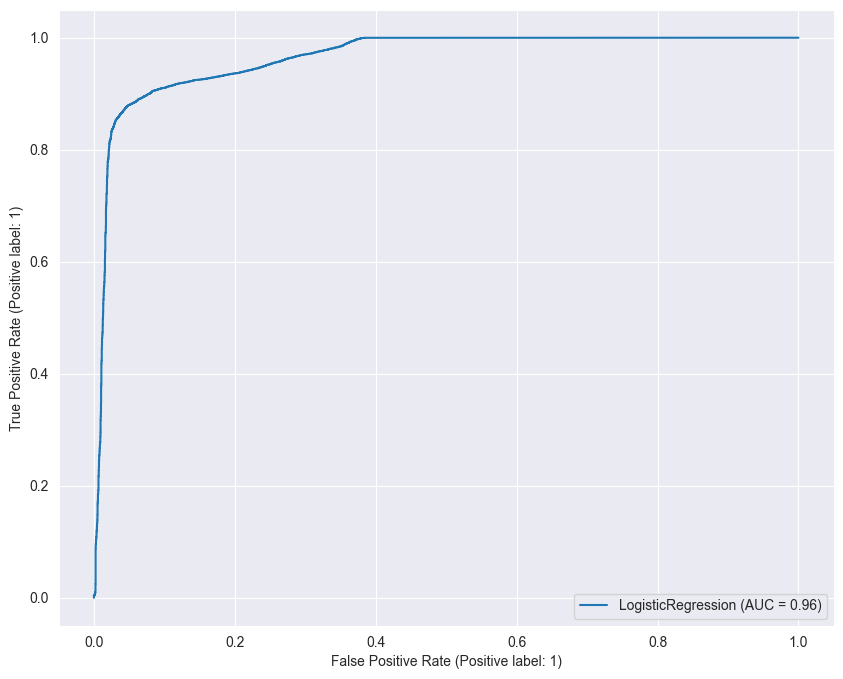

In [45]:
RocCurveDisplay.from_estimator(reg, X_test, y_test)

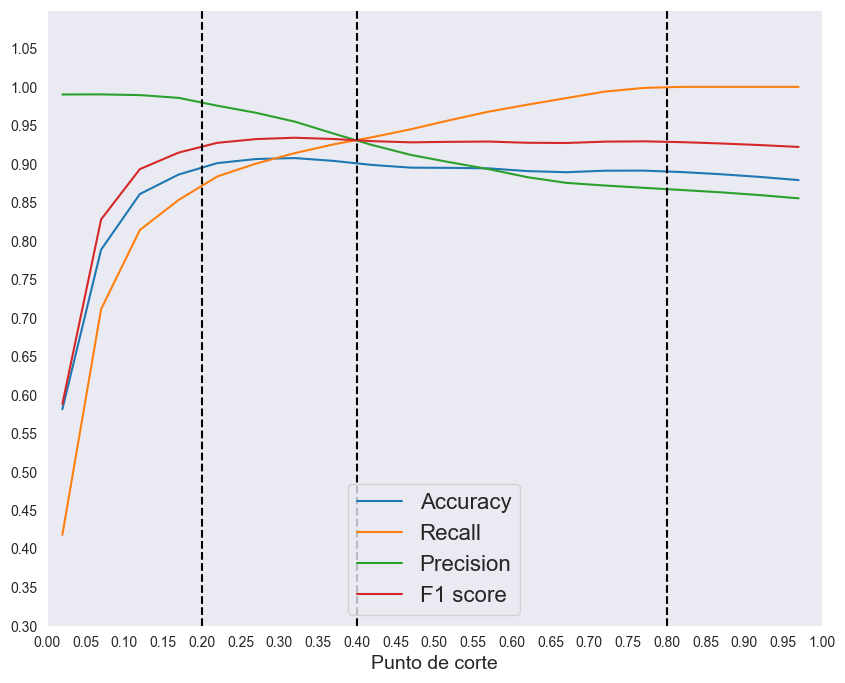

In [37]:
y_prob_reg = reg.predict_proba(X_test)

puntos_corte = np.arange(0.02, 1, 0.05)
acc = []
recall = []
prec = []
f1 = []

for p in puntos_corte:
    y_pred_custom = np.ones(y_test.shape)
    for i in range(y_prob_reg.shape[0]):
        if y_prob_reg[i, 0] > p:
            y_pred_custom[i] = 0
    acc.append( accuracy_score(y_test, y_pred_custom) )
    recall.append( recall_score(y_test, y_pred_custom) )
    prec.append( precision_score(y_test, y_pred_custom) )
    f1.append( f1_score(y_test, y_pred_custom) )

avg_acc = sum(acc) / len(acc)
avg_recall = sum(recall) / len(recall)
avg_prec = sum(prec) / len(prec)
avg_f1 = sum(f1) / len(f1)


plt.plot(puntos_corte, acc, puntos_corte, recall, puntos_corte, prec, puntos_corte, f1)
plt.xlim(0,1)
plt.ylim(0.3,1.1)
plt.xlabel('Punto de corte', fontsize=14)
plt.yticks(np.arange(0.3,1.1,0.05))
plt.xticks(np.arange(0,1.05,0.05))
plt.legend(['Accuracy','Recall','Precision','F1 score'], loc='lower center', fontsize=16)
plt.axvline(x=0.8, c="black", ls="--")
plt.axvline(x=0.4, c="black", ls="--")
plt.axvline(x=0.2, c="black", ls="--")
plt.grid(False)

Accuracy:  0.89
Recall:  1.0
Precision:  0.87
F1:  0.93


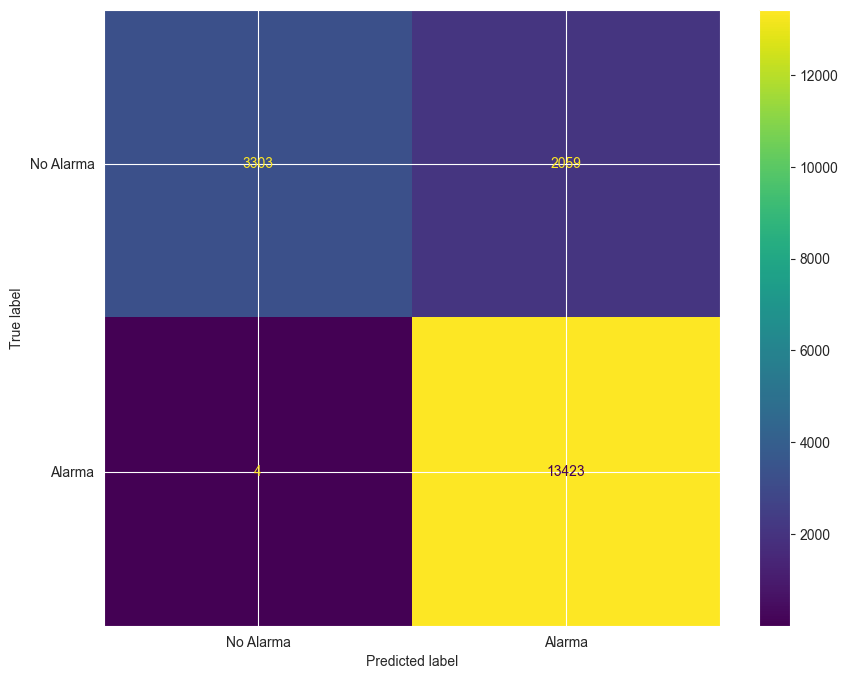

In [38]:

y_pred_reg_08 = np.ones(y_test.shape)

for i in range(y_test.shape[0]):
    if y_prob_reg[i,0] >= 0.8:
        y_pred_reg_08[i] = 0

# Matriz de confusion
conf = confusion_matrix(y_test, y_pred_reg_08)
disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=target)
disp.plot(values_format='d')
# Scoring
accuracy = accuracy_score(y_test, y_pred_reg_08)
recall = recall_score(y_test, y_pred_reg_08)
precision = precision_score(y_test, y_pred_reg_08)
f1 = f1_score(y_test, y_pred_reg_08)

print('Accuracy: ', round(accuracy,2))
print('Recall: ', round(recall,2))
print('Precision: ', round(precision,2))
print('F1: ', round(f1,2))
